# Texas Hospital Discharge - EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

import seaborn as sns
sns.set_style("darkgrid")

from IPython.display import display, Markdown
pd.set_option('display.max_columns', None)  

import glob, os

DEBUG = False
SEED = 42

In [78]:
%load_ext autoreload
%autoreload 2

import my_lib

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [79]:
df = pd.read_csv("data/df_train_sample_00_of_20.csv", dtype=str)
df.shape

(49984, 195)

## 1. Assign Labels

In [80]:
feature_labels = {}
target = "TARGET"
relevant_features = ["TYPE_OF_ADMISSION","SOURCE_OF_ADMISSION","PAT_STATE", "SEX_CODE", "RACE", "ETHNICITY", "ADMIT_WEEKDAY", "PAT_AGE", "POA_PROVIDER_INDICATOR"]

In [81]:

# TYPE_OF_ADMISSION
codes = "1 2 3 4 5 9".split()
labels = ["Emergency", "Urgent", "Elective", "Newborn", "Trauma Center", "Information Not Available"]
feature_labels["TYPE_OF_ADMISSION"] = {c:"(%s) %s" %(c,l) for c,l in zip(codes,labels)}

# SOURCE_OF_ADMISSION
my_lib.encode_labels = lambda s: {line[0]: "(%s) %s" % (line[0], line[2:].strip()) for line in s.split("\n") if len(line) > 0}

feature_labels["SOURCE_OF_ADMISSION"] = my_lib.encode_labels("""
1 Non-Healthcare Facility Point of Origin
2 Clinic referral
4 Transfer from a hospital
5 Transfer from a skilled nursing facility
6 Transfer from another health care facility
8 Court/Law Enforcement
9 Information not available
0 Transfer from psychiatric hospital
B Transfer from another home health agency
D Transfer within Hospital
E Transfer from Amubulatory Surgery Center
F Transfer from a Hospice Facility
` Invalid """)

# PAT_STATE
my_lib.encode_labels = lambda s: {line[0:2].strip(): "(%s) %s" % (line[0:2], line[3:].strip()) for line in s.split("\n") if len(line) > 0}

feature_labels["PAT_STATE"] = my_lib.encode_labels("""
AR Arkansas
LA Louisiana
NM New Mexico
OK Oklahoma
TX Texas
ZZ All other states and American Territories
FC Foreign country
XX Foreign country""")

# SEX_CODE
codes = ["M", "F", "U"]
labels = ["Male", "Female", "Unknown"]
feature_labels["SEX_CODE"] = {c:"(%s) %s" %(c,l) for c,l in zip(codes,labels)}

# RACE
my_lib.encode_labels = lambda s: {line[0]: "(%s) %s" % (line[0], line[2:].strip()) for line in s.split("\n") if len(line) > 0}

feature_labels["RACE"] = my_lib.encode_labels("""
1 American Indian/Eskimo/Aleut
2 Asian or Pacific Islander
3 Black
4 White
5 Other
` Invalid""")

# ETHNICITY
codes = ["1", "2", "`"]
labels = ["Hispanic", "Not Hispanic", "Invalid"]
feature_labels["ETHNICITY"] = {c:"(%s) %s" %(c,l) for c,l in zip(codes,labels)}

# ADMIT_WEEKDAY
my_lib.encode_labels = lambda s: {line[0]: "(%s) %s" % (line[0], line[2:].strip()) for line in s.split("\n") if len(line) > 0}

feature_labels["ADMIT_WEEKDAY"] = my_lib.encode_labels("""
1 Monday 
2 Tuesday 
3 Wednesday 
4 Thursday 
5 Friday
6 Saturday
7 Sunday
` Invalid""")

# PAT_AGE
my_lib.encode_labels = lambda s: {line[0:2].strip(): "(%s) %s" % (line[0:2], line[3:].strip()) for line in s.split("\n") if len(line) > 0}

feature_labels["PAT_AGE"] = my_lib.encode_labels("""
00 1-28 days 
01 29-365 days 
02 1-4 years 12 
03 5-9 
04 10-14
05 15-17 
06 18-19 
07 20-24 
08 25-29 
09 30-34 
10 35-39 
11 40-44 
12 45-49  
13 50-54 
14 55-59 
15 60-64 
16 65-69 
17 70-74 
18 75-79 
19 80-84 
20 85-89
21 90+
22 0-17 (HIV & D/A)
23 18-44 (HIV & D/A)
24 45-64 (HIV & D/A)
25 65-74 (HIV & D/A)
26 75+ (HIV & D/A)
` Invalid
""")

# POA_PROVIDER_INDICATOR
my_lib.encode_labels = lambda s: {line[0]: "(%s) %s" % (line[0], line[2:].strip()) for line in s.split("\n") if len(line) > 0}

feature_labels["POA_PROVIDER_INDICATOR"] = my_lib.encode_labels("""
M Mixed
R Required
X Exempt
` Invalid 
""")

from pprint import pprint
pprint(feature_labels)

{'ADMIT_WEEKDAY': {'1': '(1) Monday',
                   '2': '(2) Tuesday',
                   '3': '(3) Wednesday',
                   '4': '(4) Thursday',
                   '5': '(5) Friday',
                   '6': '(6) Saturday',
                   '7': '(7) Sunday',
                   '`': '(`) Invalid'},
 'ETHNICITY': {'1': '(1) Hispanic',
               '2': '(2) Not Hispanic',
               '`': '(`) Invalid'},
 'PAT_AGE': {'00': '(00) 1-28 days',
             '01': '(01) 29-365 days',
             '02': '(02) 1-4 years 12',
             '03': '(03) 5-9',
             '04': '(04) 10-14',
             '05': '(05) 15-17',
             '06': '(06) 18-19',
             '07': '(07) 20-24',
             '08': '(08) 25-29',
             '09': '(09) 30-34',
             '10': '(10) 35-39',
             '11': '(11) 40-44',
             '12': '(12) 45-49',
             '13': '(13) 50-54',
             '14': '(14) 55-59',
             '15': '(15) 60-64',
             '16': '(16) 65-69'

## 2. EDA

#### TYPE_OF_ADMISSION

**Distribution**

(1) Emergency                    21625
(3) Elective                     12951
(2) Urgent                        8564
(4) Newborn                       6409
(5) Trauma Center                  233
(9) Information Not Available      201
NaN                                  1
Name: TYPE_OF_ADMISSION, dtype: int64

**Count Plots**

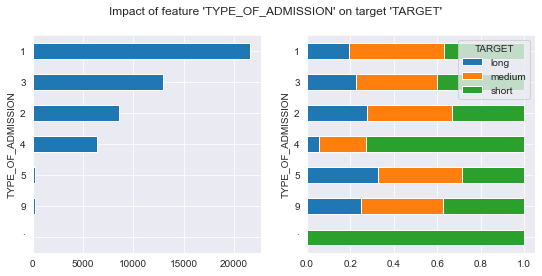

**Chi-Sq Goodness of Fit**

Chi-Square statistic 3.3733e+03 (p=0.0000e+00, dof=12)




#### SOURCE_OF_ADMISSION

**Distribution**

(1) Non-Healthcare Facility Point of Origin       29906
(2) Clinic referral                                8779
(5) Transfer from a skilled nursing facility       6636
(4) Transfer from a hospital                       3304
(6) Transfer from another health care facility      427
(8) Court/Law Enforcement                           408
(D) Transfer within Hospital                        250
(9) Information not available                       234
(`) Invalid                                          31
NaN                                                   9
Name: SOURCE_OF_ADMISSION, dtype: int64

**Count Plots**

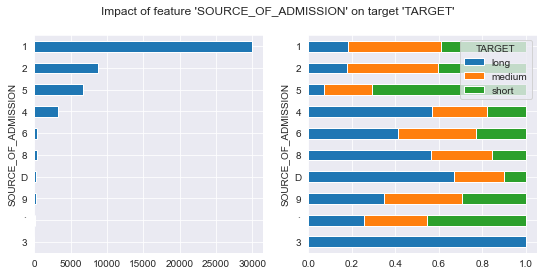

**Chi-Sq Goodness of Fit**

Chi-Square statistic 6.3328e+03 (p=0.0000e+00, dof=18)




#### PAT_STATE

**Distribution**

(TX) Texas                                        48606
(ZZ) All other states and American Territories      412
(NM) New Mexico                                     316
(AR) Arkansas                                       223
(OK) Oklahoma                                       170
(FC) Foreign country                                138
(LA) Louisiana                                      101
NaN                                                  12
(XX) Foreign country                                  6
Name: PAT_STATE, dtype: int64

**Count Plots**

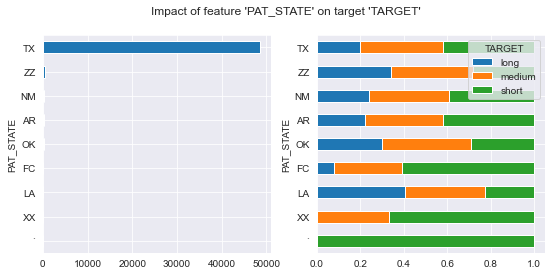

**Chi-Sq Goodness of Fit**

Chi-Square statistic 1.3535e+02 (p=5.8288e-21, dof=16)




#### SEX_CODE

**Distribution**

(F) Female     27809
(M) Male       18638
NaN             3532
(U) Unknown        5
Name: SEX_CODE, dtype: int64

**Count Plots**

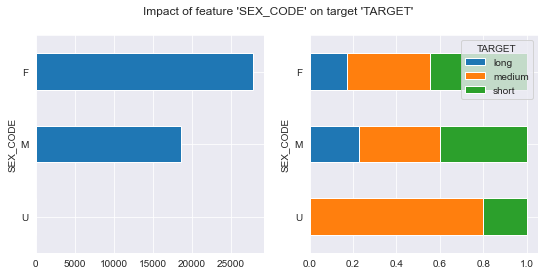

**Chi-Sq Goodness of Fit**

Chi-Square statistic 2.4842e+02 (p=1.4247e-52, dof=4)




#### RACE

**Distribution**

(4) White                           31220
(5) Other                           10838
(3) Black                            6585
(2) Asian or Pacific Islander        1021
NaN                                   171
(1) American Indian/Eskimo/Aleut      138
(`) Invalid                            11
Name: RACE, dtype: int64

**Count Plots**

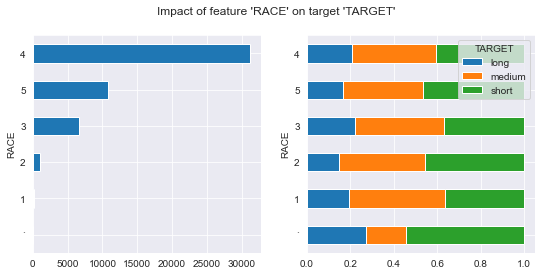

**Chi-Sq Goodness of Fit**

Chi-Square statistic 2.2923e+02 (p=1.2459e-43, dof=10)




#### ETHNICITY

**Distribution**

(2) Not Hispanic    35094
(1) Hispanic        14334
NaN                   366
(`) Invalid           190
Name: ETHNICITY, dtype: int64

**Count Plots**

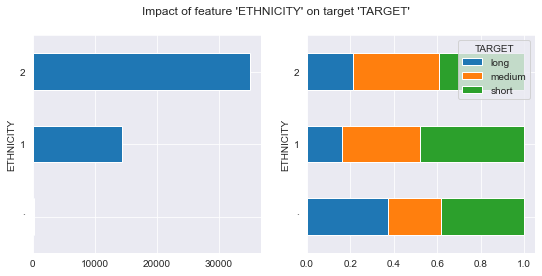

**Chi-Sq Goodness of Fit**

Chi-Square statistic 3.8875e+02 (p=7.4994e-83, dof=4)




#### ADMIT_WEEKDAY

**Distribution**

(1) Monday       8746
(2) Tuesday      8555
(3) Wednesday    8078
(4) Thursday     7792
(5) Friday       7411
(6) Saturday     4815
(7) Sunday       4587
Name: ADMIT_WEEKDAY, dtype: int64

**Count Plots**

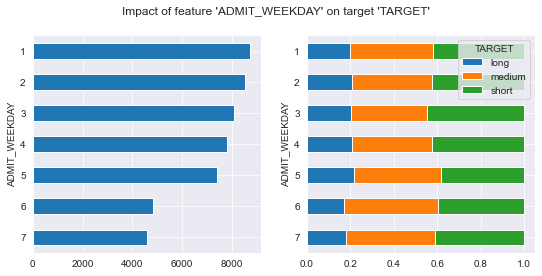

**Chi-Sq Goodness of Fit**

Chi-Square statistic 1.7084e+02 (p=3.2118e-30, dof=12)




#### PAT_AGE

#### POA_PROVIDER_INDICATOR

**Distribution**

(M) Mixed       25716
(R) Required    18638
(X) Exempt       5630
Name: POA_PROVIDER_INDICATOR, dtype: int64

**Count Plots**

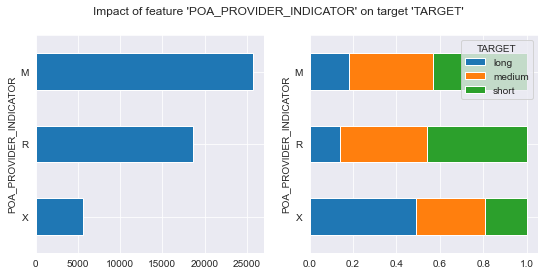

**Chi-Sq Goodness of Fit**

Chi-Square statistic 3.5846e+03 (p=0.0000e+00, dof=4)


In [82]:
for f in relevant_features:
    my_lib.eda_categorical(df, f, target, labels=feature_labels[f])

## 3. Cleaning Categorical Features

In [83]:
my_lib.clean_categories(df, feature_labels=feature_labels)

Feture TYPE_OF_ADMISSION -> ['3' '1' '2' '4' '5' '9']
Feture SOURCE_OF_ADMISSION -> ['4' '1' '2' '8' '5' '9' '6' 'D']
Feture PAT_STATE -> ['TX' 'ZZ' 'XX']
Feture SEX_CODE -> ['F' 'M' 'U']
Feture RACE -> ['4' '5' '3' '2' '1']
Feature PAT_AGE -> ['80-89' '50-59' '60-69' '70-79' '10-19' '90+' '40-49' '30-39'
 '0-17 (HIV & D/A)' '0' '20-29' '45-64 (HIV & D/A)' '18-44 (HIV & D/A)'
 '1-9' '65-74 (HIV & D/A)' '75+ (HIV & D/A)']


## 4. EDA After Cleanup

#### TYPE_OF_ADMISSION

**Distribution**

(1) Emergency                    21625
(3) Elective                     12951
(2) Urgent                        8564
(4) Newborn                       6409
(5) Trauma Center                  233
(9) Information Not Available      202
Name: TYPE_OF_ADMISSION, dtype: int64

**Count Plots**

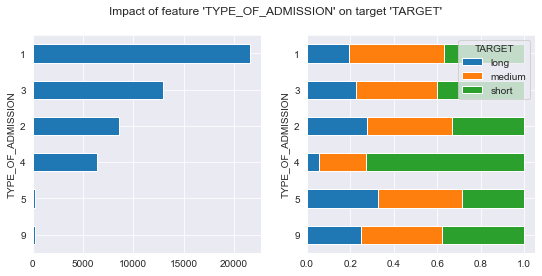

**Chi-Sq Goodness of Fit**

Chi-Square statistic 3.3716e+03 (p=0.0000e+00, dof=10)




#### SOURCE_OF_ADMISSION

**Distribution**

(1) Non-Healthcare Facility Point of Origin       29906
(2) Clinic referral                                8779
(5) Transfer from a skilled nursing facility       6636
(4) Transfer from a hospital                       3304
(6) Transfer from another health care facility      427
(8) Court/Law Enforcement                           408
(9) Information not available                       274
(D) Transfer within Hospital                        250
Name: SOURCE_OF_ADMISSION, dtype: int64

**Count Plots**

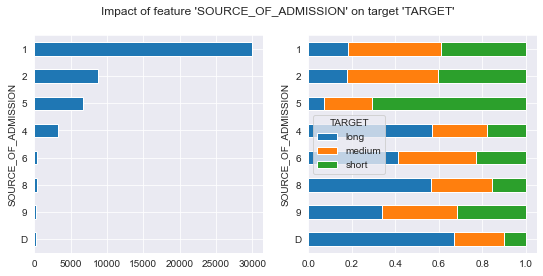

**Chi-Sq Goodness of Fit**

Chi-Square statistic 6.3261e+03 (p=0.0000e+00, dof=14)




#### PAT_STATE

**Distribution**

(TX) Texas                                        48606
(ZZ) All other states and American Territories     1361
(XX) Foreign country                                 17
Name: PAT_STATE, dtype: int64

**Count Plots**

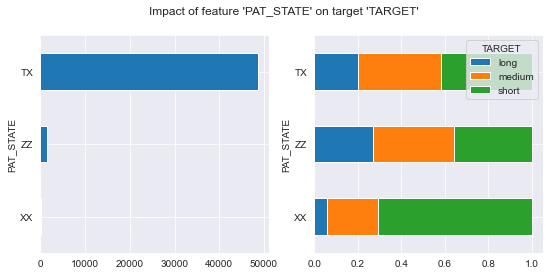

**Chi-Sq Goodness of Fit**

Chi-Square statistic 5.0867e+01 (p=2.3796e-10, dof=4)




#### SEX_CODE

**Distribution**

(F) Female     27809
(M) Male       18638
(U) Unknown     3537
Name: SEX_CODE, dtype: int64

**Count Plots**

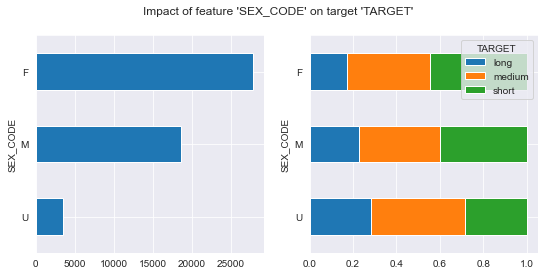

**Chi-Sq Goodness of Fit**

Chi-Square statistic 5.5346e+02 (p=1.8264e-118, dof=4)




#### RACE

**Distribution**

(4) White                           31220
(5) Other                           11020
(3) Black                            6585
(2) Asian or Pacific Islander        1021
(1) American Indian/Eskimo/Aleut      138
Name: RACE, dtype: int64

**Count Plots**

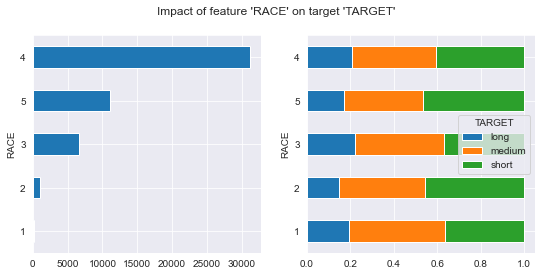

**Chi-Sq Goodness of Fit**

Chi-Square statistic 2.1506e+02 (p=4.2563e-42, dof=8)




#### ETHNICITY

**Distribution**

(2) Not Hispanic    35094
(1) Hispanic        14334
Unknown               556
Name: ETHNICITY, dtype: int64

**Count Plots**

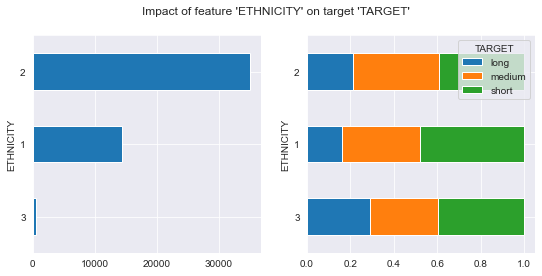

**Chi-Sq Goodness of Fit**

Chi-Square statistic 3.8068e+02 (p=4.1462e-81, dof=4)




#### ADMIT_WEEKDAY

**Distribution**

(1) Monday       8746
(2) Tuesday      8555
(3) Wednesday    8078
(4) Thursday     7792
(5) Friday       7411
(6) Saturday     4815
(7) Sunday       4587
Name: ADMIT_WEEKDAY, dtype: int64

**Count Plots**

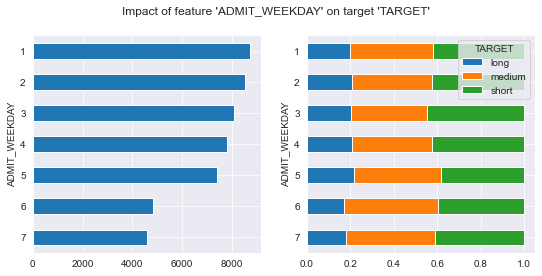

**Chi-Sq Goodness of Fit**

Chi-Square statistic 1.7084e+02 (p=3.2118e-30, dof=12)




#### PAT_AGE

**Distribution**

NaN    49984
Name: PAT_AGE, dtype: int64

**Count Plots**

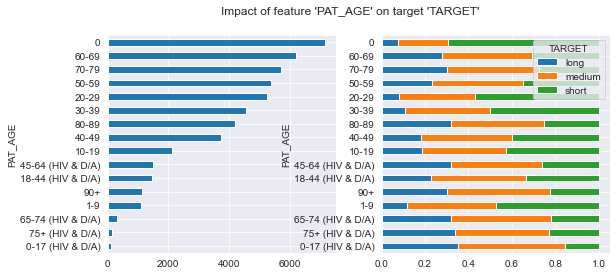

**Chi-Sq Goodness of Fit**

Chi-Square statistic 5.5354e+03 (p=0.0000e+00, dof=30)




#### POA_PROVIDER_INDICATOR

**Distribution**

(M) Mixed       25716
(R) Required    18638
(X) Exempt       5630
Name: POA_PROVIDER_INDICATOR, dtype: int64

**Count Plots**

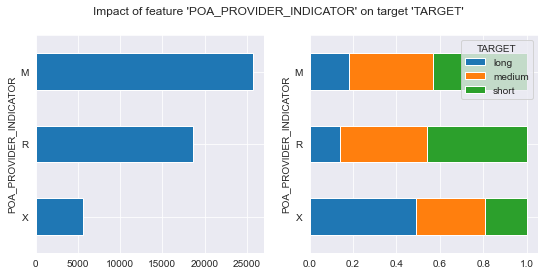

**Chi-Sq Goodness of Fit**

Chi-Square statistic 3.5846e+03 (p=0.0000e+00, dof=4)


In [84]:
for f in relevant_features:
    my_lib.eda_categorical(df, f, target, labels=feature_labels[f])